# Laboratório de Raizes de Equações

Nesta aula, iremos implementar métodos para encontrar raízes de equações, polinomiais ou não.

Antes de mais nada, precisamos criar métodos para resolver um polinomio dado um valor de X. Um polinômio pode ser representado como um vetor de coeficientes. Por exemplo, um polinômio $3x^4-6x^3+4x^2-29$ poderia ser representado por:

In [10]:
import numpy as np
pol = np.array([-29,0,4,-6,3])

De posse de um polinômio, é importante ter uma função que calcule o valor do polinômio para um valor de X qualquer:

In [11]:
def resolve(coef,x):
    y = 0;
    for i in range(len(coef)):
        y+=(coef[i])*(x**i)
    return y
resolve(pol,2.254)

0.04809409476800397

Outra coisa importante pode ser uma função para calcular a derivada de um polinômio (isto pode ser útil para calcular a multiplicidade de uma raiz:

In [12]:
def deriva(coef):
    for i in range(1,len(coef)):
        coef[i-1] =  coef[i]*i
    coef = coef[0:-1]
    return coef


def multiplicidade(coef,raiz):
    v = coef
    multi =0
    while resolve(v,raiz) ==0 and len(v)> 0:
        v = deriva(v)
        multi +=1
    return multi


In [13]:
print(str(deriva(pol)))

[  0   8 -18  12]


Teste seu código com a multiplicidade da raiz 1 no seguinte polinômio: $x^4+2x^3-12x^2+14x-5$:

In [14]:
p = np.array([-5, 14, -12, 2, 1])

multiplicidade(p,1)


3

Outro fator importante para encontrar as raízes de uma equação algébrica é o uso do teorema de Lagrange para encontrar os limites das raízes positivas e das negativas. Faça uma função que calcule o valor de Lagrange para um polinômio e outra que, dada os coeficientes de uma equação algébrica, retorne os quatro limites:

In [15]:
def lagrange(coef):
    n = len(coef)-1
    if (coef[n] < 0):
        coef = coef*(-1)
    cn = coef[n]
    k = 0
    b = coef.min() *-1
    for i in range(n,-1,-1):
        if(coef[i]<0):
            k = i
            break
    return (1+(b/cn)**(1/(n-k))) 

In [16]:
pt = np.array([-5,14,-12,2,1])
lagrange(pt)

4.464101615137754

In [17]:
def LimitesAlgebricos(coef):
    n= len(coef)-1
    limiteSupPos = lagrange(coef)
    limiteInfPos = 1/(lagrange(coef[::-1]))
    for i in range(n+1):
        if(i%2 != 0):
            coef[i]= coef[i]*-1
    limiteInfNeg = -(lagrange(coef))
    p3= coef[::-1]
    limiteSupNeg= -(1/(lagrange(p3)))
    return (limiteSupPos,limiteInfPos,limiteSupNeg,limiteInfNeg)


Verifique o funcionamento das suas funções criadas para o polinomio: $-x^4-2x^3+12x^2-14x+5$

In [18]:
p1 = np.array([5,-14,12,-2,-1])
LimitesAlgebricos(p1)

(4.464101615137754, 0.2631578947368421, -0.5992544178491148, -15.0)

Outro fator importante é a regra de sinal de descartes. Faça uma função que retorne o número de raízes positivas e negativas (se não puder precisar o número de negativas, retorne -1):

In [19]:
def nraizes(coef):
    npositivas = 0
    nnegativas = 0
    tam = len(coef)-1
    verif = 0
    i = 1
    n = coef[0]
    while(i<=tam):
        while (coef[i]==0):
            i+= 1
            verif = 1
    
        if ((coef[i]>0 and n >0) or (coef[i]<0 and n <0)):
            nnegativas +=1
        else:
            npositivas += 1
            n = coef[i]
        i+= 1
        if(verif ==1):
            nnegativas =-1
    return (npositivas, nnegativas) 

Para a função $x^5-2x^4+x^3-2x^2+5$ e para $x^3-3x^2-6x+8$ ache o intervalo das raizes positivas e negativas, o número de raízes de cada tipo e plote um grafico para valores desde o limite inferior negativo até o limite superior positivo:

In [20]:
teste = np.array([5,0,-2,1,-2,1])

LimitesAlgebricos(teste)

(3.0, 0.6125741132772068, -0.6125741132772068, -2.379729661461215)

In [21]:
#!pip3 install matplotlib --user
#salva no proprio notebook
import matplotlib.pyplot as plt
%matplotlib inline 

In [22]:

teste = np.array([5,0,-2,1,-2,1])

def func(x):
    return (x**5)-2*(x**4)+(x**3)-2*(x**2)+5
    
def LimitesAlgebricos(coef):
    n= len(coef)-1
    limiteSupPos = lagrange(coef)
    limiteInfPos = 1/(lagrange(coef[::-1]))
    for i in range(n+1):
        if(i%2 != 0):
            coef[i]= coef[i]*-1
    limiteInfNeg = -(lagrange(coef))
    p3= coef[::-1]
    limiteSupNeg= -(1/(lagrange(p3)))
    
    x = np.linspace(-7,7,1000)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.xticks(np.linspace(-15,15,11))
    plt.yticks(np.linspace(-15,15,11))
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    plt.axhline(0, color='black',linewidth=1)
    plt.scatter(limiteSupPos,0, 40, color ='black', label="Limites Superior Positivo")
    plt.scatter(limiteInfPos,0, 40, color ='green', label="Limites Inferior Positivo")
    plt.scatter(limiteSupNeg,0, 40, color ='red', label="limites Superior Negativo")
    plt.scatter(limiteInfNeg,0, 40, color ='blue', label="limites Inferior Negativo")
    plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad =0)
    plt.plot(x, func(x))
    plt.show()

    return (limiteSupPos,limiteInfPos,limiteSupNeg,limiteInfNeg)
    

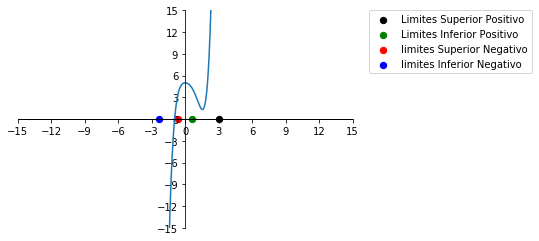

(3.0, 0.6125741132772068, -0.6125741132772068, -2.379729661461215)

In [23]:
LimitesAlgebricos(teste)

In [24]:

teste1 = np.array([8,-6,-3,1]) #encontrar os limites
def func1(x):
    return (x**3)-3*(x**2)-6*x+8 # plotar a funcao

def LimitesAlgebricos(coef):
    n= len(coef)-1
    limiteSupPos = lagrange(coef)
    limiteInfPos = 1/(lagrange(coef[::-1]))
    for i in range(n+1):
        if(i%2 != 0):
            coef[i]= coef[i]*-1
    limiteInfNeg = -(lagrange(coef))
    p3= coef[::-1]
    limiteSupNeg= -(1/(lagrange(p3)))
    
    x = np.linspace(-7,7,1000)
    
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.xticks(np.linspace(-15,15,11))
    plt.yticks(np.linspace(-15,15,11))
    plt.xlim(-16,16)
    plt.ylim(-15,15)
    plt.axhline(0, color='black',linewidth=1)
    plt.scatter(limiteSupPos,0, 40, color ='black', label="Limites Superior Positivo")
    plt.scatter(limiteInfPos,0, 40, color ='green', label="Limites Inferior Positivo")
    plt.scatter(limiteSupNeg,0, 40, color ='red', label="limites Superior Negativo")
    plt.scatter(limiteInfNeg,0, 40, color ='blue', label="limites Inferior Negativo")
    plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad =0)
    plt.plot(x, func1(x))
    plt.show()

    return (limiteSupPos, limiteInfPos, limiteSupNeg, limiteInfNeg)

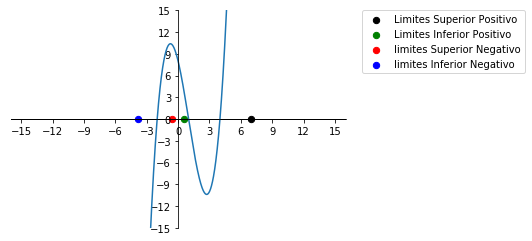

(7.0, 0.5714285714285714, -0.6202041028867288, -3.8284271247461903)

In [25]:
LimitesAlgebricos(teste1)

Faça um programa que receba uma equação transcendente (na forma de função) e um ponto e tente descobrir um intervalo com uma raiz (slide 80 de isolamento de raízes):

In [26]:
def achaIntervalo(f,z): #Voce pode rodar a função aqui dentro chamando f(x)
    if(z==0):
        a = -0.05
        b = 0.05
    else:
        a = 0.95*z
        b = 1.05*z
    while(f(a)*f(b)>0):
        if(f(a)<f(b)):
            a = a-0.5
        else:
            b = b+0.5
    #chama a derivada la de cima

    return (a,b) #intervalo

Teste seu método com a função abaixo:

In [27]:
def func2(x):
    return np.sin(x**2)

achaIntervalo(func2,2.5)

(2.375, 2.625)

Agora vamos implementar a bissecção. O método da bissecção recebe como parametro uma função e um intervalo, e encontra uma raiz neste intervalo usando uma busca binária. O método pode ter três critérios de parada:

- Número de Iterações
- Proximidade da raiz
- Proximidade entre iterações.

Aqui vamos implementar **os três**

In [28]:
def bisseccao(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    i=0
    raiz=(a+b)/2 # ((-30+(-1))/2) 
    while(i<niter and ((b-a)>proximidadeIter) and (f(raiz)>minimo or f(raiz)<0)):
        if(f(a)*f(raiz)<0):
            b = raiz
        elif(f(b)*f(raiz)<0):
            a = raiz
        raiz = (a+b)/2
        i+=1
    return raiz, i

Agora vamos testar nosso método da bissecção com a função $e^x-x-2$ para o intervalo [-30,-1]:

In [29]:
def f(x):
    return np.exp(x)-x-2

In [30]:
bisseccao(f,-30,-1)

(-1.8414057493209839, 22)